# Model Testing

This notebook tests the performance of learning algorithms trained to classify Higgs boson and ttbar events. The optimisation of the models' hyperparameters, as well as their training, is performed by the `app/train.py` script.

Let's load the test dataset and separate the features `X_test` from the prediction labels `y_test`.

In [1]:
import sys
sys.path.append('../')
import pandas
import keras
from hbbclass.dnn.utils import plot_roc_curve

In [2]:
# Load test dataset
df_test = pandas.read_csv('../data/processed/test.csv', index_col=0)
# Get features and prediction label
features = ['Hcand_C2', 'Hcand_D2', 'Hcand_tau21', 'Hcand_tau32']
pred_label = 'is_signal'
X_test = df_test[features]
y_test = df_test[pred_label]

## Deep Neural Network Model

The architecture of the deep neural network model is defined by of the hyperparameter tuning process.
- The input is a four-dimensional array designed to contain the jet substructure variables.
- The hidden layers are `Dense` layers with a `ReLu` activation function.
- The output is a single neuron with a `sigmoid` activation function, representing the probability for a candidate jet to be generated by the decay of a Higgs boson.
- For this binary classification problem we use the `binary_crossentropy` cost function.

Let's load the model and print its architecture.

In [3]:
# Load optimized DNN model
model = keras.models.load_model('../data/models/dnn/dnn_model.model')
# Print model architecture
print('DNN Model Architecture:')
for layer in model.get_config()['layers']:
    layer_name = layer['class_name']
    print(f'- {layer_name}:')
    for key, value in layer['config'].items():
        if key in ['batch_input_shape', 'units', 'activation']:
            print(f'\t{key}: {value}')

DNN Model Architecture:
- InputLayer:
	batch_input_shape: (None, 4)
- Dense:
	units: 48
	activation: relu
- Dense:
	units: 16
	activation: relu
- Dense:
	units: 120
	activation: relu
- Dense:
	units: 144
	activation: relu
- Dense:
	units: 1
	activation: sigmoid


Now that we have loaded the model, we can evaluate its performance on the test sample. Since we are dealing with balanced classes, we can use the accuracy metric to test the model's performance. The accuracy is defined as the ratio between the number of correct predictions and the total number of predictions. Equivalently, the accuracy can be defined as

$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$,

where `TP` is the number of true positives, `TN` is the number of true negatives, `FP` is the number of false positives and `FN` is the number of false negatives.

In [4]:
_, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {round(accuracy, 3)*100}%')

 224/1313 [====>.........................] - ETA: 0s - loss: 0.5645 - accuracy: 0.7292

2023-03-10 13:07:21.134579: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1313/1313 [==============================] - 1s 403us/step - loss: 0.5646 - accuracy: 0.7311
Test Accuracy: 73.1%


A good indicator of a model's performance is the "receiver operating characteristic" (ROC) curve. It displays the background rejection as a function of the signal efficiency. Equivalently, the ROC curve shows `1-FPR` as function of `TPR`, where `FPR` is the false positive rate and `TPR` is the true positive rate.

1313/1313 [==============================] - 1s 376us/step


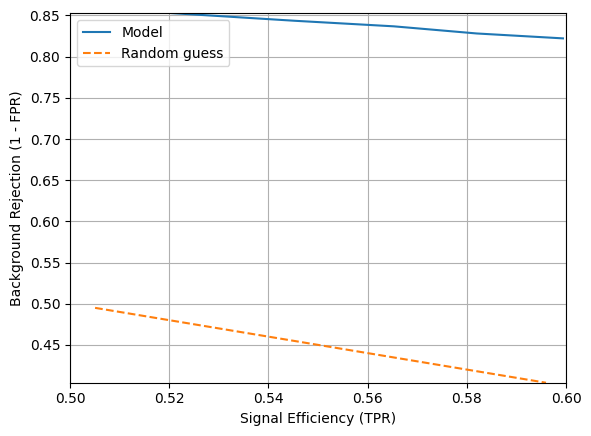

In [8]:
y_pred = model.predict(X_test)[:,0]
plot_roc_curve(y_test, y_pred, xlims=(0.5,0.6))